In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")

In [20]:
df = pd.read_csv("lead_scoring.csv")
df

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.00,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.50,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,...,No,Potential Lead,Jakarta,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,...,No,Select,Jakarta,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,...,No,Select,Jakarta,02.Medium,01.High,15.0,18.0,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,...,No,Potential Lead,Jakarta,02.Medium,01.High,15.0,17.0,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,...,No,Potential Lead,Jakarta,02.Medium,01.High,14.0,19.0,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,...,No,Potential Lead,Jakarta,02.Medium,01.High,13.0,20.0,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,...,No,NaN,Other Metro Cities,02.Medium,02.Medium,15.0,16.0,No,No,SMS Sent


In [21]:
df.shape

(9240, 37)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Prospect ID                                     9240 non-null   object 
 1   Lead Number                                     9240 non-null   int64  
 2   Lead Origin                                     9240 non-null   object 
 3   Lead Source                                     9204 non-null   object 
 4   Do Not Email                                    9240 non-null   object 
 5   Do Not Call                                     9240 non-null   object 
 6   Converted                                       9240 non-null   int64  
 7   TotalVisits                                     9103 non-null   float64
 8   Total Time Spent on Website                     9240 non-null   int64  
 9   Page Views Per Visit                     

In [23]:
df.isna().sum()

Prospect ID                                          0
Lead Number                                          0
Lead Origin                                          0
Lead Source                                         36
Do Not Email                                         0
Do Not Call                                          0
Converted                                            0
TotalVisits                                        137
Total Time Spent on Website                          0
Page Views Per Visit                               137
Last Activity                                      103
Country                                           2461
Specialization                                    1438
How did you hear about Madugital                  2207
What is your current occupation                   2690
What matters most to you in choosing a product    2709
Search                                               0
Magazine                                             0
Newspaper 

In [24]:
df = df.drop(['Lead Source', 'Last Activity','Country','Specialization', 'How did you hear about Madugital',
             'What is your current occupation','What matters most to you in choosing a product','Tags','Lead Quality',
            'Lead Profile','City','Asymmetrique Activity Index','Asymmetrique Profile Index'], axis=1)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 24 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Prospect ID                               9240 non-null   object 
 1   Lead Number                               9240 non-null   int64  
 2   Lead Origin                               9240 non-null   object 
 3   Do Not Email                              9240 non-null   object 
 4   Do Not Call                               9240 non-null   object 
 5   Converted                                 9240 non-null   int64  
 6   TotalVisits                               9103 non-null   float64
 7   Total Time Spent on Website               9240 non-null   int64  
 8   Page Views Per Visit                      9103 non-null   float64
 9   Search                                    9240 non-null   object 
 10  Magazine                            

In [26]:
df.isna().sum()

Prospect ID                                    0
Lead Number                                    0
Lead Origin                                    0
Do Not Email                                   0
Do Not Call                                    0
Converted                                      0
TotalVisits                                  137
Total Time Spent on Website                    0
Page Views Per Visit                         137
Search                                         0
Magazine                                       0
Newspaper Article                              0
Madugital Telegram                             0
Newspaper                                      0
Digital Advertisement                          0
Through Recommendations                        0
Receive More Updates About Our Products        0
Update me on Supply Chain Content              0
Get updates on DM Content                      0
Asymmetrique Activity Score                 4218
Asymmetrique Profile

In [27]:
rata_visit = df['TotalVisits'].mean()
df['TotalVisits'] = df['TotalVisits'].fillna(rata_visit)
df['TotalVisits'].isna().sum()

0

In [28]:
rata_visit = df['Page Views Per Visit'].mean()
df['Page Views Per Visit'] = df['Page Views Per Visit'].fillna(rata_visit)
df['Page Views Per Visit'].isna().sum()

0

In [29]:
rata_score = df['Asymmetrique Activity Score'].mean()
df['Asymmetrique Activity Score'] = df['Asymmetrique Activity Score'].fillna(rata_score)
df['Asymmetrique Activity Score'].isna().sum()

0

In [30]:
rata_score = df['Asymmetrique Profile Score'].mean()
df['Asymmetrique Profile Score'] = df['Asymmetrique Profile Score'].fillna(rata_score)
df['Asymmetrique Profile Score'].isna().sum()

0

In [31]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.818723,548.021466,2.145333,1.022265,1.335352
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,16.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.306252,16.344883
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,14.306252,16.344883
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


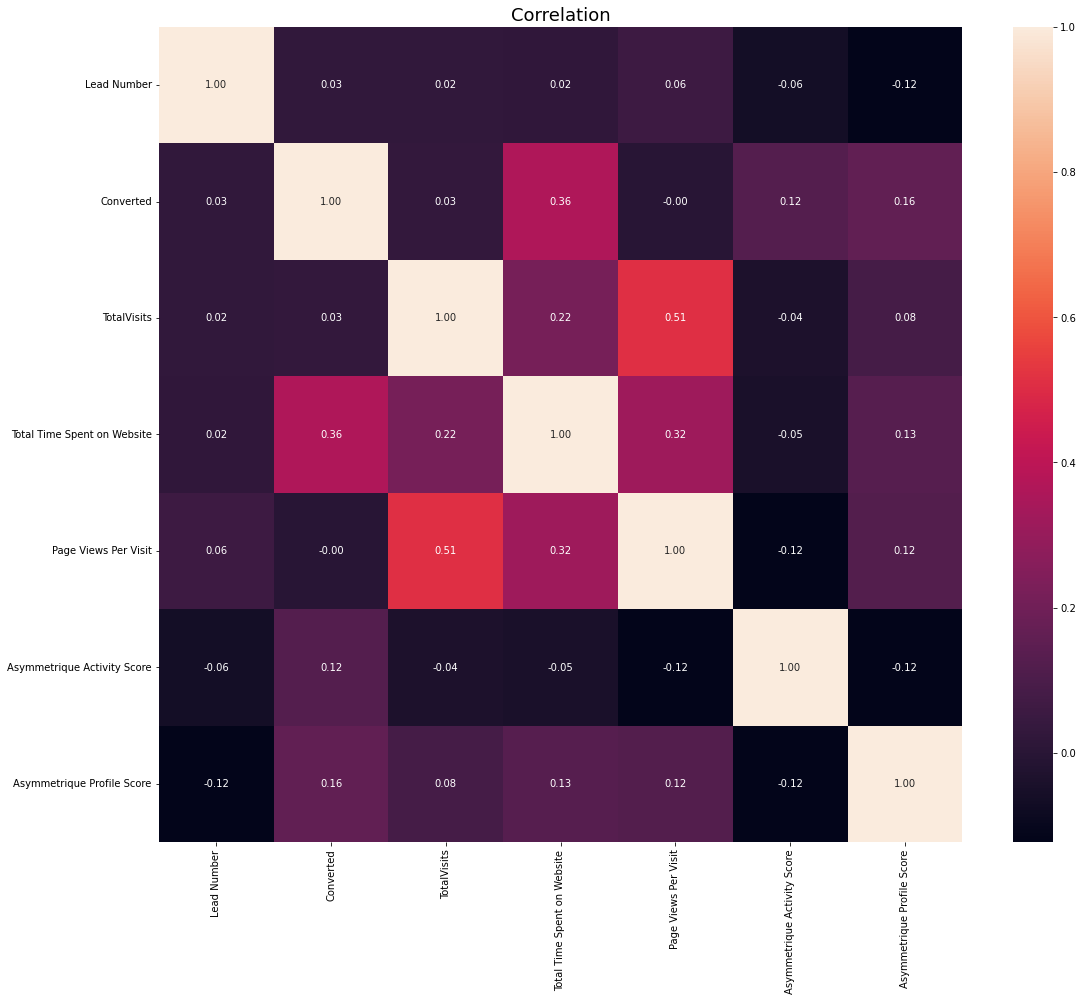

In [32]:
plt.figure(figsize=(18,15))
sns.heatmap(df.corr(),annot=True, fmt=".2f")
plt.title("Correlation",fontsize=18,color="black");

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


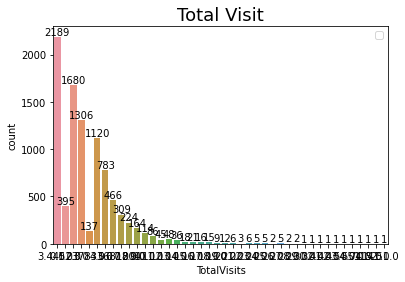

In [45]:
ax = sns.countplot(df.TotalVisits)
plt.title("Total Visit",fontsize=18, color="black")
plt.bar_label(ax.containers[0])
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


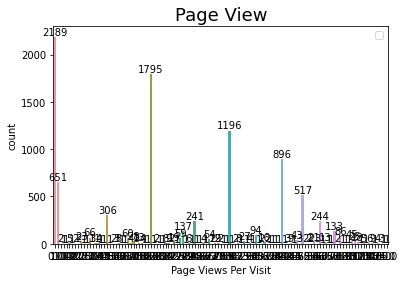

In [47]:
ax = sns.countplot(df['Page Views Per Visit'])
plt.title("Page View",fontsize=18, color="black")
plt.bar_label(ax.containers[0])
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


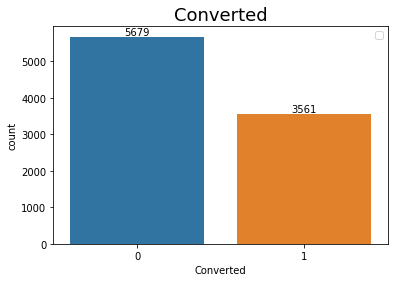

In [48]:
ax = sns.countplot(df['Converted'])
plt.title("Converted",fontsize=18, color="black")
plt.bar_label(ax.containers[0])
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


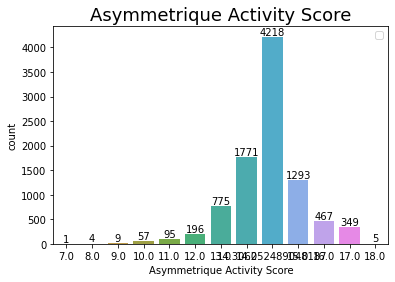

In [49]:
ax = sns.countplot(df['Asymmetrique Activity Score'])
plt.title("Asymmetrique Activity Score",fontsize=18, color="black")
plt.bar_label(ax.containers[0])
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


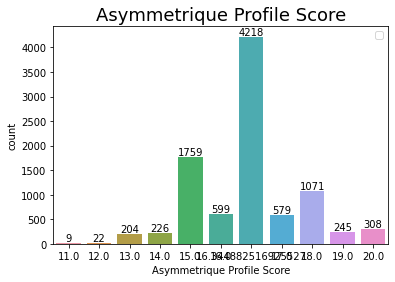

In [50]:
ax = sns.countplot(df['Asymmetrique Profile Score'])
plt.title("Asymmetrique Profile Score",fontsize=18, color="black")
plt.bar_label(ax.containers[0])
plt.legend()

In [63]:
X_new = ['TotalVisits','Asymmetrique Profile Score','Page Views Per Visit','Total Time Spent on Website','Asymmetrique Activity Score']

In [64]:
X = df[X_new]
y = df['Converted']

In [65]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(X,y, test_size=0.2, random_state=42)
print("Train_x :",train_x.shape)
print("Test_x :",test_x.shape)
print("Train_y :",train_y.shape)
print("Test_y :",test_y.shape)

Train_x : (7392, 5)
Test_x : (1848, 5)
Train_y : (7392,)
Test_y : (1848,)


In [37]:
#logistic regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg = logreg.fit(train_x, train_y)
y_pred = logreg.predict(test_x)

In [38]:
print('Training Accuracy :', logreg.score(train_x, train_y)) 
print('Testing Accuracy :', logreg.score(test_x, test_y))

Training Accuracy : 0.7157738095238095
Testing Accuracy : 0.7045454545454546


In [39]:
from sklearn.metrics import f1_score

print("Logistic Regression F1 Score :",f1_score(test_y,logreg.predict(test_x),average=None))

Logistic Regression F1 Score : [0.78089888 0.54651163]


In [40]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model = model.fit(train_x, train_y)
y_pred = model.predict(test_x)


In [41]:
from sklearn.metrics import confusion_matrix, classification_report
print('Training Accuracy :', model.score(train_x, train_y)) 
print('Testing Accuracy :', model.score(test_x, test_y))

Training Accuracy : 0.9143668831168831
Testing Accuracy : 0.6877705627705628


In [42]:
#linear regression
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg = linreg.fit(train_x, train_y)
y_pred = linreg.predict(test_x)

In [43]:
print('Training Accuracy :', linreg.score(train_x, train_y)) 
print('Testing Accuracy :', linreg.score(test_x, test_y))

Training Accuracy : 0.18714287307221134
Testing Accuracy : 0.16446897782505265


# Solve Imbalance Dataset Problem(Undersampling)

In [52]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=0)
x_resampled,y_resampled = rus.fit_resample(X,y)

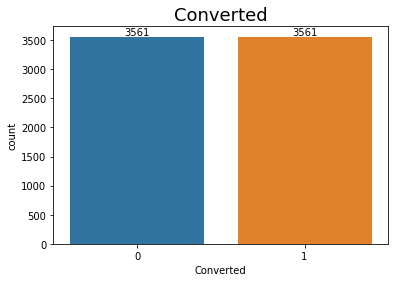

In [53]:
ax = sns.countplot(y_resampled)
plt.bar_label(ax.containers[0])
plt.title("Converted", fontsize=18,color="black");

In [54]:
#Train Test Split After Undersampling
train_x, test_x, train_y, test_y = train_test_split(x_resampled,y_resampled, test_size=0.2, random_state=42)
print("Train_x :",train_x.shape)
print("Test_x :",test_x.shape)
print("Train_y :",train_y.shape)
print("Test_y :",test_y.shape)

Train_x : (5697, 5)
Test_x : (1425, 5)
Train_y : (5697,)
Test_y : (1425,)


In [55]:
#Logistic Regression After Undersampling
logreg = LogisticRegression()
logreg = logreg.fit(train_x, train_y)
y_pred = logreg.predict(test_x)
print('Training Accuracy :', logreg.score(train_x, train_y)) 
print('Testing Accuracy :', logreg.score(test_x, test_y))

Training Accuracy : 0.6849218887133579
Testing Accuracy : 0.6687719298245614


In [56]:
#Decision Tree Classifier After Undersampling
model = DecisionTreeClassifier()
model = model.fit(train_x, train_y)
y_pred = model.predict(test_x)
from sklearn.metrics import confusion_matrix, classification_report
print('Training Accuracy :', model.score(train_x, train_y)) 
print('Testing Accuracy :', model.score(test_x, test_y))

Training Accuracy : 0.9139898192030893
Testing Accuracy : 0.6792982456140351


In [57]:
#linear regression After Undersampling
linreg = LinearRegression()
linreg = linreg.fit(train_x, train_y)
y_pred = linreg.predict(test_x)
print('Training Accuracy :', linreg.score(train_x, train_y)) 
print('Testing Accuracy :', linreg.score(test_x, test_y))

Training Accuracy : 0.191719952216991
Testing Accuracy : 0.15754462749910847
